In [1]:
print("Project name : Fiancial Risk Analysis")

Project name : Fiancial Risk Analysis


In [ ]:
# A brief about problem statement

In [ ]:
'''
For any organization, even the slightest chance of financial risk can not be ignored. Organizations conduct regular inspections 
on their expenditures and revenue to make sure that they do not fall below the critical limit. In this hackathon, you as a data
scientist must use the given data to predict whether an organization is under a possible financial risk or not.

Given are 7 distinguishing factors that can provide insight into whether an organization may face a financial risk or not.
Your objective as a data scientist is to build a machine learning model that can predict if an organization will fall under the 
risk using the given features.
The leaderboard is evaluated using sklearn.metrics.log_loss for the participant’s submission.
'''

In [ ]:
# Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import f1_score,roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,ComplementNB,BernoulliNB

In [ ]:
# Loading dataset

In [124]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [ ]:
# shape of dataset

In [5]:
print("shape of training dataset:",train.shape)
print("shape of test dataset:",test.shape)

shape of training dataset: (543, 8)
shape of test dataset: (233, 7)


In [ ]:
# Basic stats value

In [6]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


In [ ]:
# Lets see a few rows from top of training dataset

In [7]:
train.head(4)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0


In [ ]:
# A few rows from bottom

In [8]:
train.tail(4)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
539,2,70.460,7,5,6,4,0,0
540,1,79.243,7,5,3,8,1,0
541,40,69.140,7,8,4,5,1,1
542,13,23.332,14,12,10,3,2,1


In [ ]:
# a few random rows

In [158]:
train.sample(5)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
76,40,21.057,7,5,4,8,0,1
264,16,8.297,7,5,4,7,0,0
273,9,11.595,13,4,7,3,1,1
185,37,66.535,4,7,4,6,1,0
342,13,18.501,12,12,5,6,1,1


In [ ]:
# Lets see the test dataset

In [155]:
test.sample(5)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
71,37,20.891,10,10,10,7,0
15,37,69.472,5,3,3,6,1
42,40,8.813,6,6,4,7,1
47,13,7.140,10,10,14,5,1
154,2,19.369,4,9,6,5,1


In [ ]:
# Detailed summary of train dataset

In [12]:
pd.DataFrame({"TotalMissing":train.isna().sum(),"%Missing":train.isna().mean(),"DataType":train.dtypes,"Unique":train.nunique()})

,TotalMissing,%Missing,DataType,Unique
City,0,0.0,int64,43
Location_Score,0,0.0,float64,540
Internal_Audit_Score,0,0.0,int64,13
External_Audit_Score,0,0.0,int64,13
Fin_Score,0,0.0,int64,13
Loss_score,0,0.0,int64,10
Past_Results,0,0.0,int64,7
IsUnderRisk,0,0.0,int64,2


In [ ]:
# Detailed summary of test dataset

In [13]:
pd.DataFrame({"TotalMissing":test.isna().sum(),"%Missing":test.isna().mean(),"DataType":test.dtypes,"Unique":test.nunique()})

,TotalMissing,%Missing,DataType,Unique
City,0,0.0,int64,34
Location_Score,0,0.0,float64,233
Internal_Audit_Score,0,0.0,int64,13
External_Audit_Score,0,0.0,int64,13
Fin_Score,0,0.0,int64,13
Loss_score,0,0.0,int64,7
Past_Results,0,0.0,int64,5


In [ ]:
'''
Dataset looks quite clean and our target column is "Is Under Risk"
'''

In [ ]:
# EDA

In [ ]:
# City

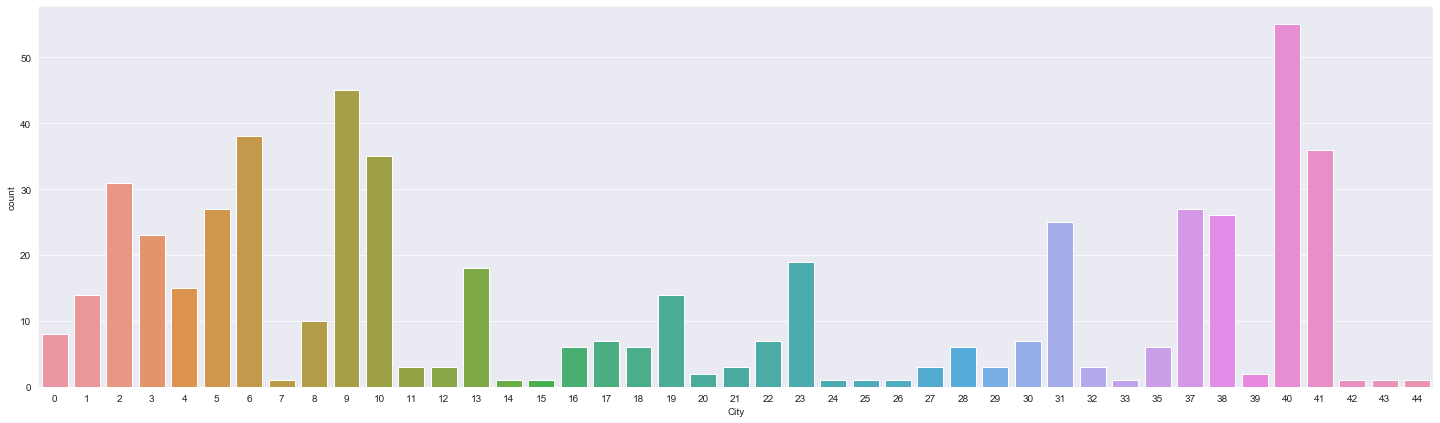

In [17]:
plt.figure(figsize=(25,7))
sns.countplot(train["City"])
plt.savefig("FR-city.png")

In [ ]:
# Location_Score 

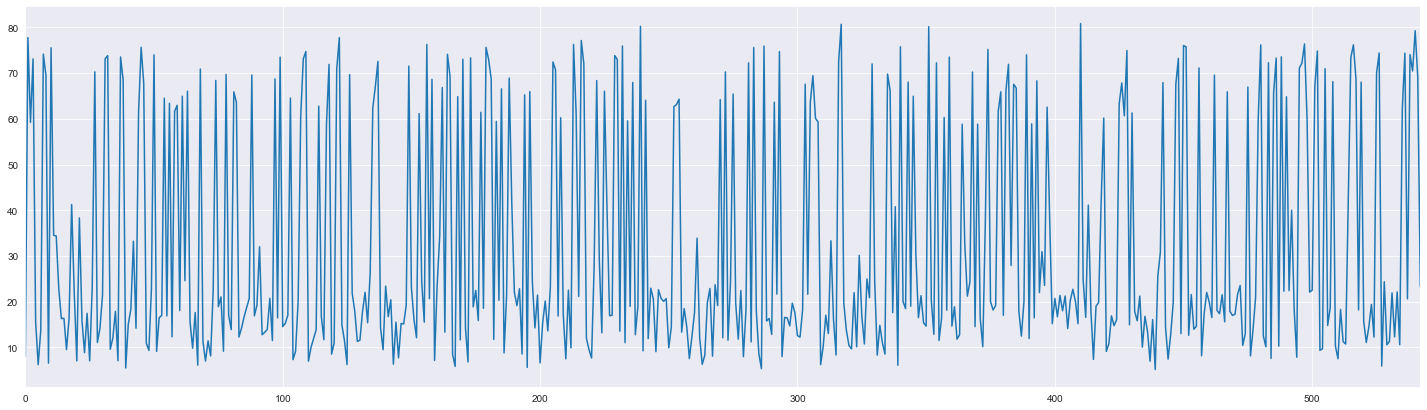

In [20]:
plt.figure(figsize=(25,7))
train["Location_Score"].plot()
plt.savefig("FR-Loc.png")

In [ ]:
# Internal_Audit_Score

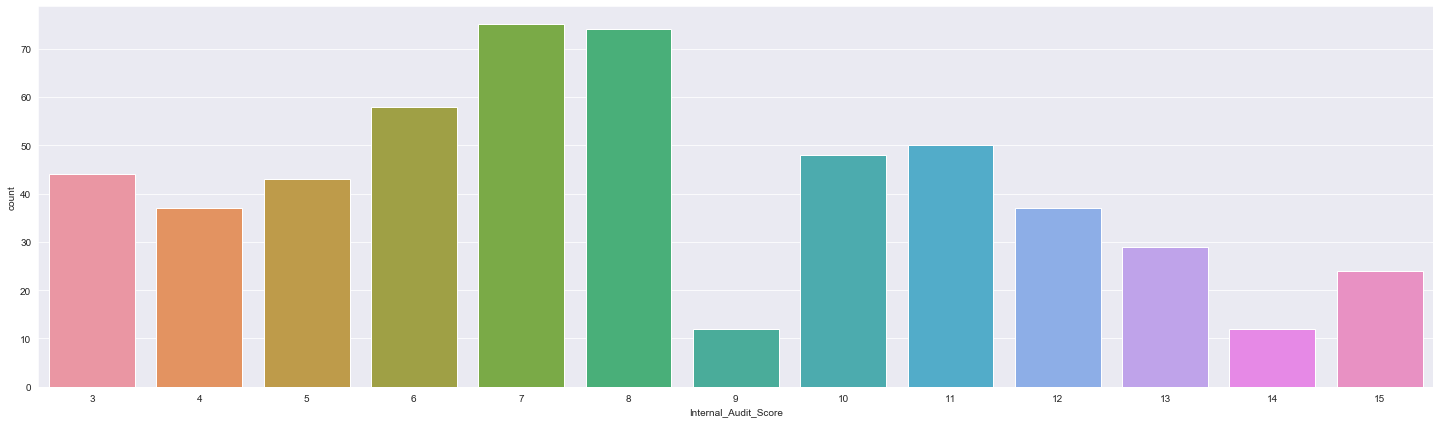

In [23]:
plt.figure(figsize=(25,7))
sns.countplot(train["Internal_Audit_Score"])
plt.savefig("FR-ias.png")

In [ ]:
# External_Audit_Score

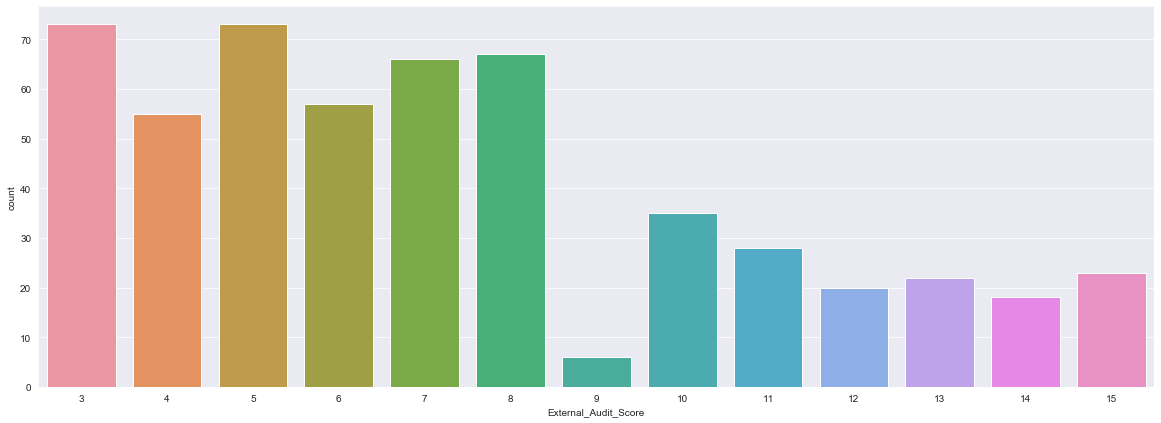

In [25]:
plt.figure(figsize=(20,7))
sns.countplot(train["External_Audit_Score"])
plt.savefig("FR-eas.png")

In [ ]:
# Fin_Score 

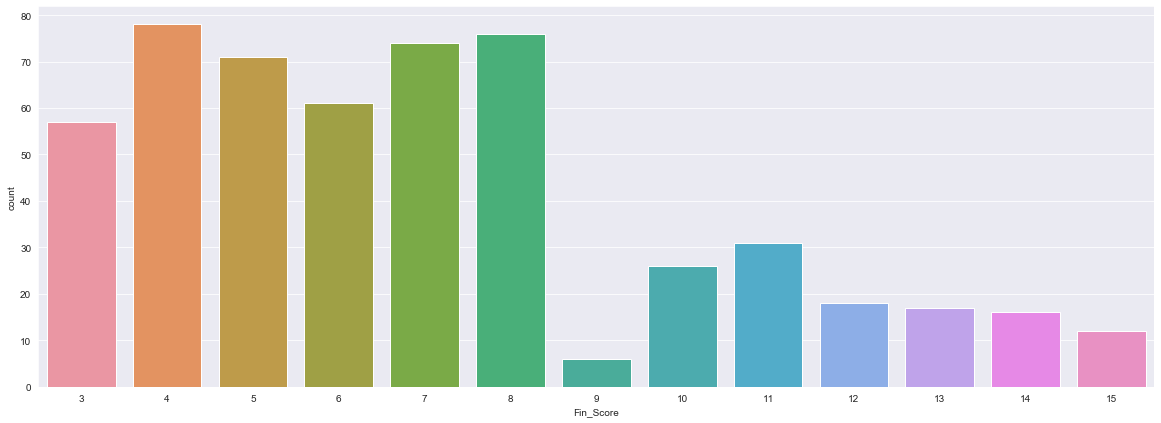

In [26]:
plt.figure(figsize=(20,7))
sns.countplot(train["Fin_Score"])
plt.savefig("FR-fin.png")

In [ ]:
# Loss_score

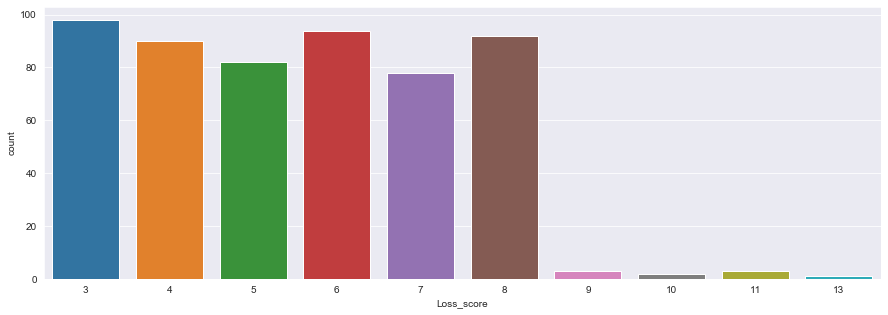

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(train["Loss_score"])
plt.savefig("FR-loss.png")

In [ ]:
# Past_Results

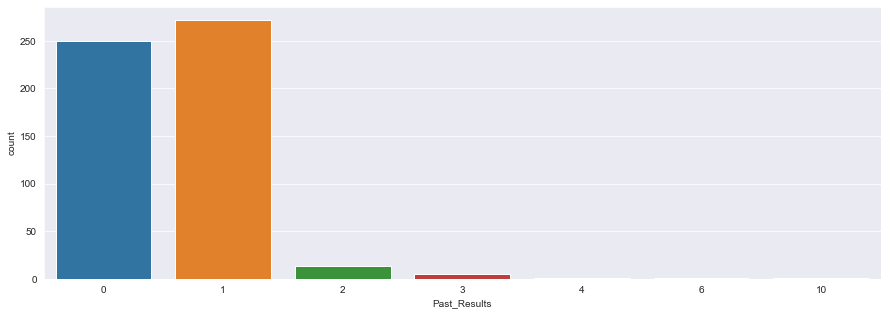

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(train["Past_Results"])
plt.savefig("FR-past.png")

In [ ]:
# Lets see the target col: IsUnderRisk

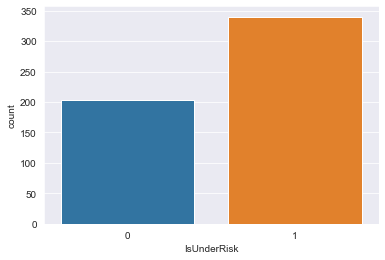

In [32]:
sns.countplot(train["IsUnderRisk"])
plt.savefig("FR-tar.png")

In [33]:
train['IsUnderRisk'].value_counts(normalize=True)

1    0.626151
0    0.373849
Name: IsUnderRisk, dtype: float64

In [ ]:
# Bivariate analysis

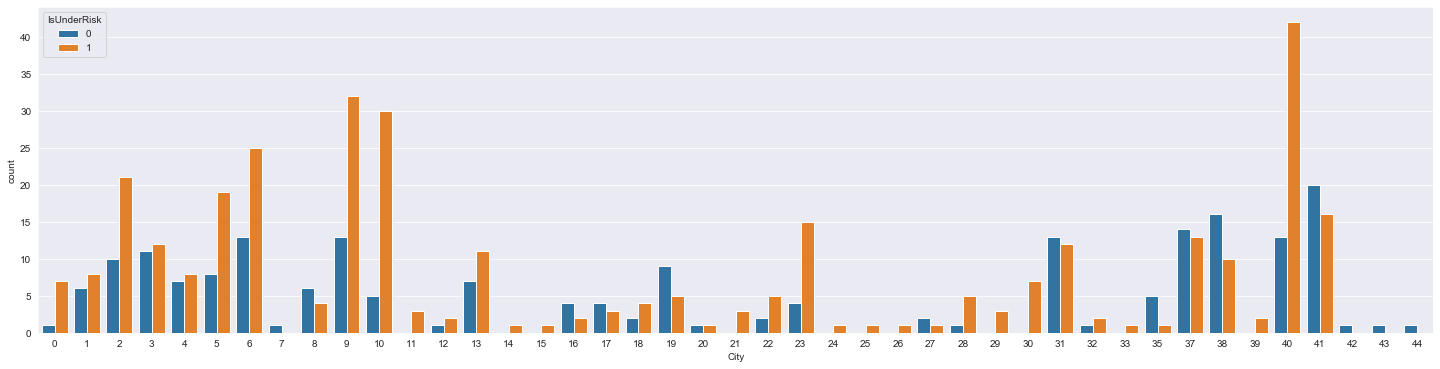

In [11]:
plt.figure(figsize=(25,6))
sns.countplot(x=train["City"],hue=train["IsUnderRisk"],data=train)
plt.savefig("cit-tar.png")

In [125]:
train['CT'] = 'na'
train.loc[(train.City >= 0) & (train.City <= 6), 'CT'] = 'HighRisk' 
train.loc[(train.City >= 9) & (train.City <= 10), 'CT'] = 'HighRisk'
train.loc[(train.City >= 13) & (train.City <= 13), 'CT'] = 'HighRisk'
train.loc[(train.City >= 23) & (train.City <= 23), 'CT'] = 'HighRisk'
train.loc[(train.City >= 30) & (train.City <= 31), 'CT'] = 'HighRisk'
train.loc[(train.City >= 37) & (train.City <= 38), 'CT'] = 'HighRisk'
train.loc[(train.City >= 40) & (train.City <= 41), 'CT'] = 'HighRisk'
train.loc[(train.City >= 7) & (train.City <= 8), 'CT'] = 'LowRisk'
train.loc[(train.City >= 11) & (train.City <= 12), 'CT'] = 'LowRisk'
train.loc[(train.City >= 14) & (train.City <= 22), 'CT'] = 'LowRisk'
train.loc[(train.City >= 24) & (train.City <= 29), 'CT'] = 'LowRisk'
train.loc[(train.City >= 32) & (train.City <= 35), 'CT'] = 'LowRisk'
train.loc[(train.City >= 39) & (train.City <= 39), 'CT'] = 'LowRisk'
train.loc[(train.City >= 42) & (train.City <= 44), 'CT'] = 'LowRisk'

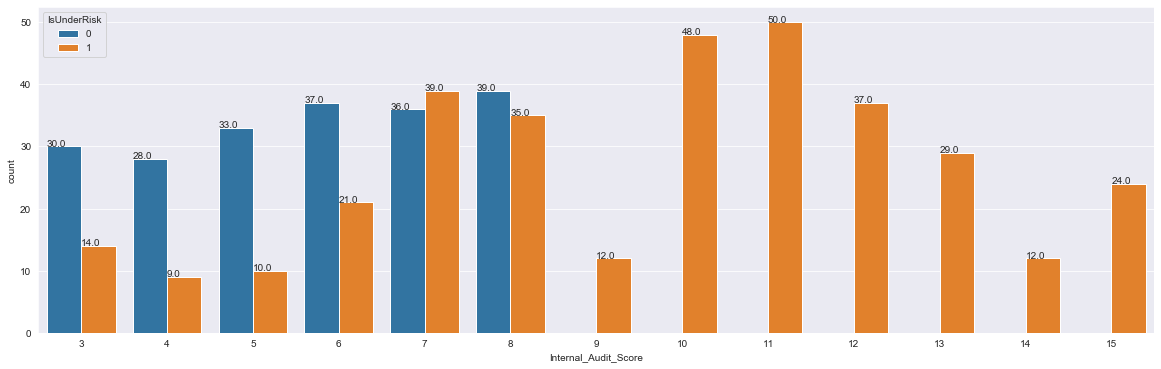

In [149]:
plt.figure(figsize=(20,6))
fig=sns.countplot(x=train["Internal_Audit_Score"],hue=train["IsUnderRisk"])
for count in fig.patches:
    fig.annotate((count.get_height()),(count.get_x(),count.get_height()))
#plt.savefig("ias-tar.png")

In [ ]:
fig=sns.countplot(train["label"])
for count in fig.patches:
    fig.annotate((count.get_height()),(count.get_x(),count.get_height()))
plt.savefig("count of label.png")

In [ ]:
'''
Here it can be said that if a firm has IAS of more than 8 then it is under risk,the less the IAS the firm is good
'''

In [126]:
train['IAS'] = 'na'
train.loc[(train.Internal_Audit_Score >= 3) & (train.Internal_Audit_Score <= 8), 'IAS'] = 'LowRisk' 
train.loc[(train.Internal_Audit_Score >= 9) & (train.Internal_Audit_Score <= 15), 'IAS'] = 'HighRisk' 

In [44]:
train.head(1)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk,IAS
0,2,8.032,14,8,3,6,0,1,HighRisk


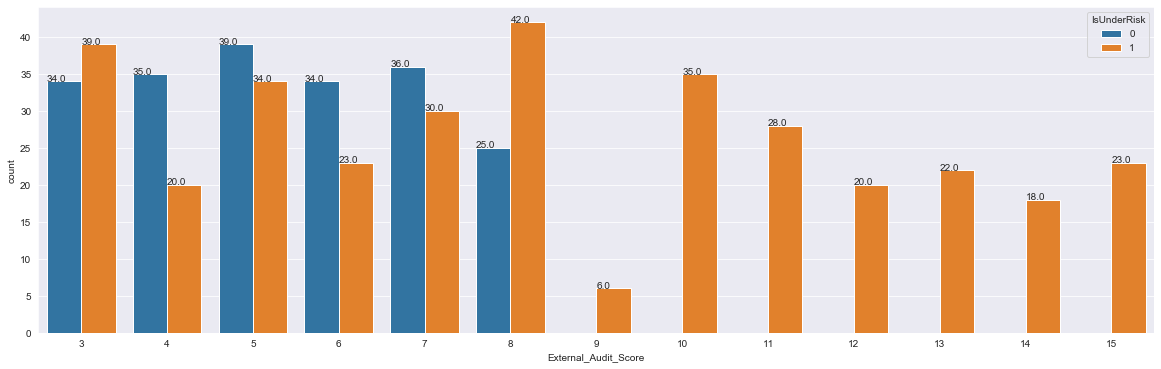

In [150]:
plt.figure(figsize=(20,6))
fig=sns.countplot(x=train["External_Audit_Score"],hue=train["IsUnderRisk"])
for count in fig.patches:
    fig.annotate((count.get_height()),(count.get_x(),count.get_height()))
#plt.savefig("eas-tar.png")

In [128]:
train['EAS'] = 'na'
train.loc[(train.External_Audit_Score >= 3) & (train.External_Audit_Score <= 8), 'EAS'] = 'LowRisk' 
train.loc[(train.External_Audit_Score >= 9) & (train.External_Audit_Score <= 15), 'EAS'] = 'HighRisk' 

In [47]:
train.head(1)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk,IAS,EAS
0,2,8.032,14,8,3,6,0,1,HighRisk,LowRisk


In [31]:
train.columns

Index(['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results',
       'IsUnderRisk'],
      dtype='object')

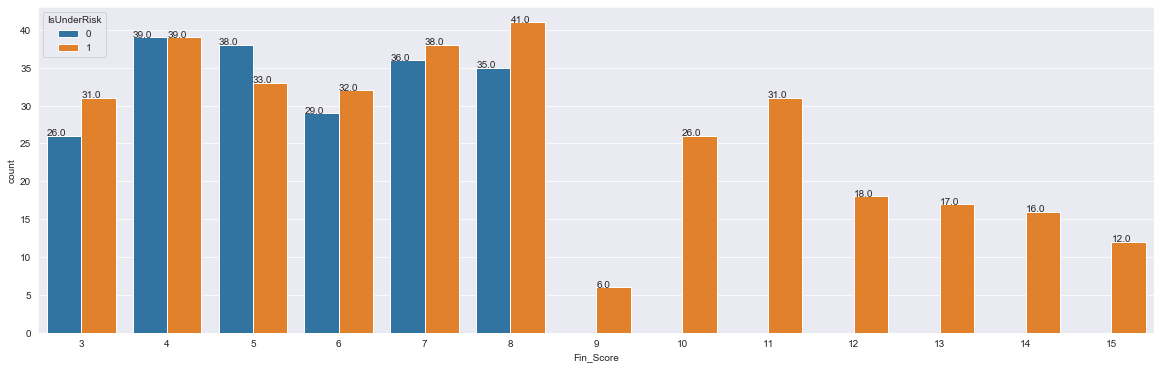

In [151]:
plt.figure(figsize=(20,6))
fig=sns.countplot(x=train["Fin_Score"],hue=train["IsUnderRisk"])
for count in fig.patches:
    fig.annotate((count.get_height()),(count.get_x(),count.get_height()))
#plt.savefig("fin-tar.png")

In [129]:
train['FS'] = 'na'
train.loc[(train.Fin_Score >= 3) & (train.Fin_Score <= 8), 'FS'] = 'LowRisk' 
train.loc[(train.Fin_Score >= 9) & (train.Fin_Score <= 15), 'FS'] = 'HighRisk' 

In [49]:
train.head(1)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk,IAS,EAS,FS
0,2,8.032,14,8,3,6,0,1,HighRisk,LowRisk,LowRisk


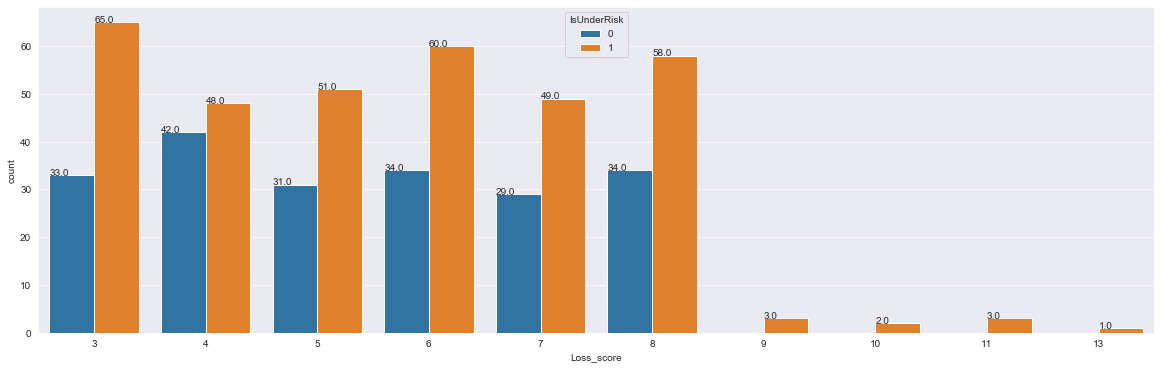

In [152]:
plt.figure(figsize=(20,6))
fig=sns.countplot(x=train["Loss_score"],hue=train["IsUnderRisk"])
for count in fig.patches:
    fig.annotate((count.get_height()),(count.get_x(),count.get_height()))
#plt.savefig("loss-tar.png")

In [130]:
train['LS'] = 'na'
train.loc[(train.Loss_score >= 3) & (train.Loss_score <= 8), 'LS'] = 'LowRisk' 
train.loc[(train.Loss_score >= 9) & (train.Loss_score <= 15), 'LS'] = 'HighRisk' 

In [51]:
train.head(1)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk,IAS,EAS,FS,LS
0,2,8.032,14,8,3,6,0,1,HighRisk,LowRisk,LowRisk,LowRisk


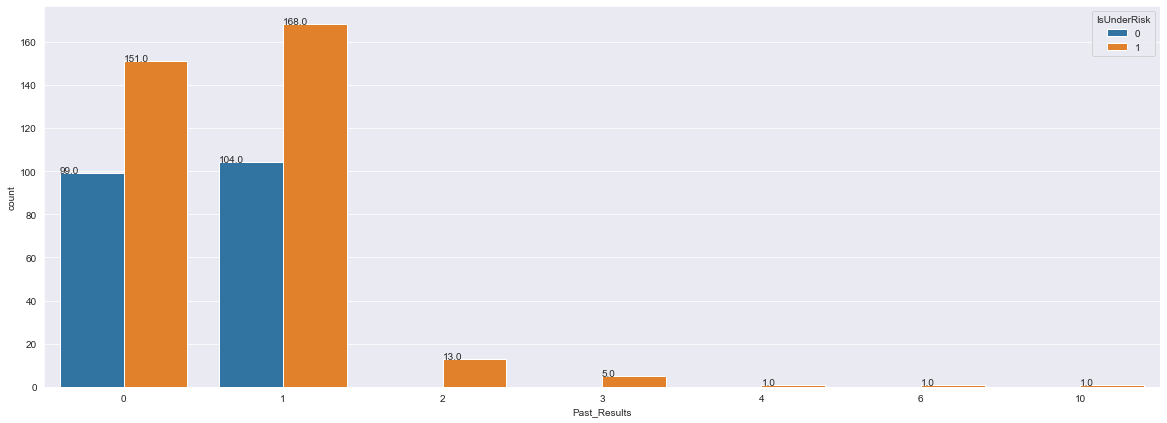

In [153]:
plt.figure(figsize=(20,7))
fig=sns.countplot(x=train["Past_Results"],hue=train["IsUnderRisk"])
for count in fig.patches:
    fig.annotate((count.get_height()),(count.get_x(),count.get_height()))
#plt.savefig("pas-tar.png")

In [ ]:
'''
If a firm has EAS more than 8 then it can be said prone to risk, so less the score less risk
'''

In [131]:
train['PR'] = 'na'
train.loc[(train.Past_Results >= 0) & (train.Past_Results <= 1), 'PR'] = 'LowRisk' 
train.loc[(train.Past_Results >= 2) & (train.Past_Results <= 10), 'PR'] = 'HighRisk' 

In [ ]:
# Location_Store

In [11]:
train["Location_Score"].min(),train["Location_Score"].max()

(5.185, 80.809)

In [132]:
train['Loc'] = 'na'
train.loc[(train.Location_Score >= 5) & (train.Location_Score <= 15), 'Loc'] = 'Under15' 
train.loc[(train.Location_Score >= 15.00001) & (train.Location_Score <= 25), 'Loc'] = 'Under25'
train.loc[(train.Location_Score >= 25.00001) & (train.Location_Score <= 35), 'Loc'] = 'Under35'
train.loc[(train.Location_Score >= 35.00001) & (train.Location_Score <= 45), 'Loc'] = 'Under45'
train.loc[(train.Location_Score >= 45.00001) & (train.Location_Score <= 55), 'Loc'] = 'Under55'
train.loc[(train.Location_Score >= 55.00001) & (train.Location_Score <= 65), 'Loc'] = 'Under65'
train.loc[(train.Location_Score >= 65.00001) & (train.Location_Score <= 75), 'Loc'] = 'Under75'
train.loc[(train.Location_Score >= 75.00001) & (train.Location_Score <= 85), 'Loc'] = 'Under85'

In [70]:
train.head(5)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk,CT,IAS,EAS,FS,LS,PR,Loc
0,2,8.032,14,8,3,6,0,1,HighRisk,HighRisk,LowRisk,LowRisk,LowRisk,LowRisk,Under15
1,31,77.730,8,3,3,8,1,0,HighRisk,LowRisk,LowRisk,LowRisk,LowRisk,LowRisk,Under85
2,40,59.203,3,12,11,3,0,1,HighRisk,LowRisk,HighRisk,HighRisk,LowRisk,LowRisk,Under65
3,12,73.080,4,5,7,6,0,0,LowRisk,LowRisk,LowRisk,LowRisk,LowRisk,LowRisk,Under75
4,4,15.666,13,15,6,7,2,1,HighRisk,HighRisk,HighRisk,LowRisk,LowRisk,HighRisk,Under25


In [ ]:
# Creating dummy variable for all categorical columns

In [358]:
ias=pd.get_dummies(train["IAS"],drop_first=True,prefix="IAS")
eas=pd.get_dummies(train["EAS"],drop_first=True,prefix="EAS")
fs=pd.get_dummies(train["FS"],drop_first=True,prefix="FS")
ls=pd.get_dummies(train["LS"],drop_first=True,prefix="LS")
pr=pd.get_dummies(train["PR"],drop_first=True,prefix="pr")

In [359]:
train=pd.concat([train,ias],axis=1)
train=pd.concat([train,eas],axis=1)
train=pd.concat([train,fs],axis=1)
train=pd.concat([train,ls],axis=1)
train=pd.concat([train,pr],axis=1)

In [360]:
train=train.drop(["IAS","EAS","FS","LS","PR"],axis=1)

In [133]:
train.head(3)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk,CT,IAS,EAS,FS,LS,PR,Loc
0,2,8.032,14,8,3,6,0,1,HighRisk,HighRisk,LowRisk,LowRisk,LowRisk,LowRisk,Under15
1,31,77.730,8,3,3,8,1,0,HighRisk,LowRisk,LowRisk,LowRisk,LowRisk,LowRisk,Under85
2,40,59.203,3,12,11,3,0,1,HighRisk,LowRisk,HighRisk,HighRisk,LowRisk,LowRisk,Under65


In [ ]:
# Lets encode all categorical variables

In [134]:
ias = {"LowRisk": 0, "HighRisk": 1}
train['IAS'] = train['IAS'].map(ias)

In [135]:
eas = {"LowRisk": 0, "HighRisk": 1}
train['EAS'] = train['EAS'].map(eas)

In [136]:
fs = {"LowRisk": 0, "HighRisk": 1}
train['FS'] = train['FS'].map(fs)

In [137]:
ls = {"LowRisk": 0, "HighRisk": 1}
train['LS'] = train['LS'].map(ls)

In [138]:
pr = {"LowRisk": 0, "HighRisk": 1}
train['PR'] = train['PR'].map(pr)

In [139]:
ct = {"LowRisk": 0, "HighRisk": 1}
train['CT'] = train['CT'].map(ct)

In [140]:
loc = {"Under15": 0, "Under25": 1,"Under35":2,"Under45":3,"Under55":4,"Under65":5,"Under75":6,"Under85":7}
train['Loc'] = train['Loc'].map(loc)

In [ ]:
# Lets see the dataset

In [141]:
train.head(4)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk,CT,IAS,EAS,FS,LS,PR,Loc
0,2,8.032,14,8,3,6,0,1,1,1,0,0,0,0,0
1,31,77.730,8,3,3,8,1,0,1,0,0,0,0,0,7
2,40,59.203,3,12,11,3,0,1,1,0,1,1,0,0,5
3,12,73.080,4,5,7,6,0,0,0,0,0,0,0,0,6


In [85]:
train.CT.unique()

array([1, 0], dtype=int64)

In [ ]:
# Lets apply same techniques to test dataset

In [142]:
test['IAS'] = 'na'
test.loc[(test.Internal_Audit_Score >= 3) & (test.Internal_Audit_Score <= 8), 'IAS'] = 'LowRisk' 
test.loc[(test.Internal_Audit_Score >= 9) & (test.Internal_Audit_Score <= 15), 'IAS'] = 'HighRisk' 
test['EAS'] = 'na'
test.loc[(test.External_Audit_Score >= 3) & (test.External_Audit_Score <= 8), 'EAS'] = 'LowRisk' 
test.loc[(test.External_Audit_Score >= 9) & (test.External_Audit_Score <= 15), 'EAS'] = 'HighRisk' 
test['FS'] = 'na'
test.loc[(test.Fin_Score >= 3) & (test.Fin_Score <= 8), 'FS'] = 'LowRisk' 
test.loc[(test.Fin_Score >= 9) & (test.Fin_Score <= 15), 'FS'] = 'HighRisk' 
test['LS'] = 'na'
test.loc[(test.Loss_score >= 3) & (test.Loss_score <= 8), 'LS'] = 'LowRisk' 
test.loc[(test.Loss_score >= 9) & (test.Loss_score <= 15), 'LS'] = 'HighRisk' 
test['PR'] = 'na'
test.loc[(test.Past_Results >= 0) & (test.Past_Results <= 1), 'PR'] = 'LowRisk' 
test.loc[(test.Past_Results >= 2) & (test.Past_Results <= 10), 'PR'] = 'HighRisk' 
test['CT'] = 'na'
test.loc[(test.City >= 0) & (test.City <= 6), 'CT'] = 'HighRisk' 
test.loc[(test.City >= 9) & (test.City <= 10), 'CT'] = 'HighRisk'
test.loc[(test.City >= 13) & (test.City <= 13), 'CT'] = 'HighRisk'
test.loc[(test.City >= 23) & (test.City <= 23), 'CT'] = 'HighRisk'
test.loc[(test.City >= 30) & (test.City <= 31), 'CT'] = 'HighRisk'
test.loc[(test.City >= 37) & (test.City <= 38), 'CT'] = 'HighRisk'
test.loc[(test.City >= 40) & (test.City <= 41), 'CT'] = 'HighRisk'
test.loc[(test.City >= 7) & (test.City <= 8), 'CT'] = 'LowRisk'
test.loc[(test.City >= 11) & (test.City <= 12), 'CT'] = 'LowRisk'
test.loc[(test.City >= 14) & (test.City <= 22), 'CT'] = 'LowRisk'
test.loc[(test.City >= 24) & (test.City <= 29), 'CT'] = 'LowRisk'
test.loc[(test.City >= 32) & (test.City <= 35), 'CT'] = 'LowRisk'
test.loc[(test.City >= 39) & (test.City <= 39), 'CT'] = 'LowRisk'
test.loc[(test.City >= 42) & (test.City <= 44), 'CT'] = 'LowRisk'
test['Loc'] = 'na'
test.loc[(test.Location_Score >= 5) & (test.Location_Score <= 15), 'Loc'] = 'Under15' 
test.loc[(test.Location_Score >= 15.00001) & (test.Location_Score <= 25), 'Loc'] = 'Under25'
test.loc[(test.Location_Score >= 25.00001) & (test.Location_Score <= 35), 'Loc'] = 'Under35'
test.loc[(test.Location_Score >= 35.00001) & (test.Location_Score <= 45), 'Loc'] = 'Under45'
test.loc[(test.Location_Score >= 45.00001) & (test.Location_Score <= 55), 'Loc'] = 'Under55'
test.loc[(test.Location_Score >= 55.00001) & (test.Location_Score <= 65), 'Loc'] = 'Under65'
test.loc[(test.Location_Score >= 65.00001) & (test.Location_Score <= 75), 'Loc'] = 'Under75'
test.loc[(test.Location_Score >= 75.00001) & (test.Location_Score <= 85), 'Loc'] = 'Under85'
ias = {"LowRisk": 0, "HighRisk": 1}
test['IAS'] = test['IAS'].map(ias)
eas = {"LowRisk": 0, "HighRisk": 1}
test['EAS'] = test['EAS'].map(eas)
fs = {"LowRisk": 0, "HighRisk": 1}
test['FS'] = test['FS'].map(fs)
ls = {"LowRisk": 0, "HighRisk": 1}
test['LS'] = test['LS'].map(ls)
pr = {"LowRisk": 0, "HighRisk": 1}
test['PR'] = test['PR'].map(pr)
ct = {"LowRisk": 0, "HighRisk": 1}
test['CT'] = test['CT'].map(ct)
loc = {"Under15": 0, "Under25": 1,"Under35":2,"Under45":3,"Under55":4,"Under65":5,"Under75":6,"Under85":7}
test['Loc'] = test['Loc'].map(loc)

In [362]:
test['IAS'] = 'na'
test.loc[(test.Internal_Audit_Score >= 3) & (test.Internal_Audit_Score <= 8), 'IAS'] = 'LowRisk' 
test.loc[(test.Internal_Audit_Score >= 9) & (test.Internal_Audit_Score <= 15), 'IAS'] = 'HighRisk' 
test['EAS'] = 'na'
test.loc[(test.External_Audit_Score >= 3) & (test.External_Audit_Score <= 8), 'EAS'] = 'LowRisk' 
test.loc[(test.External_Audit_Score >= 9) & (test.External_Audit_Score <= 15), 'EAS'] = 'HighRisk' 
test['FS'] = 'na'
test.loc[(test.Fin_Score >= 3) & (test.Fin_Score <= 8), 'FS'] = 'LowRisk' 
test.loc[(test.Fin_Score >= 9) & (test.Fin_Score <= 15), 'FS'] = 'HighRisk' 
test['LS'] = 'na'
test.loc[(test.Loss_score >= 3) & (test.Loss_score <= 8), 'LS'] = 'LowRisk' 
test.loc[(test.Loss_score >= 9) & (test.Loss_score <= 15), 'LS'] = 'HighRisk' 
test['PR'] = 'na'
test.loc[(test.Past_Results >= 0) & (test.Past_Results <= 1), 'PR'] = 'LowRisk' 
test.loc[(test.Past_Results >= 2) & (test.Past_Results <= 10), 'PR'] = 'HighRisk' 
ias=pd.get_dummies(test["IAS"],drop_first=True,prefix="IAS")
eas=pd.get_dummies(test["EAS"],drop_first=True,prefix="EAS")
fs=pd.get_dummies(test["FS"],drop_first=True,prefix="FS")
ls=pd.get_dummies(test["LS"],drop_first=True,prefix="LS")
pr=pd.get_dummies(test["PR"],drop_first=True,prefix="pr")
test=pd.concat([test,ias],axis=1)
test=pd.concat([test,eas],axis=1)
test=pd.concat([test,fs],axis=1)
test=pd.concat([test,ls],axis=1)
test=pd.concat([test,pr],axis=1)
test=test.drop(["IAS","EAS","FS","LS","PR"],axis=1)

In [ ]:
# Lets look at the test dataset

In [147]:
test.head(4)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IAS,EAS,FS,LS,PR,CT,Loc
0,41,18.272,13,12,9,7,0,1,1,1,0,0,1,1
1,17,64.799,6,10,7,4,1,0,1,0,0,0,0,5
2,31,68.890,3,3,7,8,0,0,0,0,0,0,1,6
3,3,16.492,15,10,7,4,1,1,1,0,0,0,1,1


In [145]:
test["CT"].fillna(test["CT"].mode()[0],inplace=True)

In [146]:
test["CT"]=test.CT.astype(int)

In [90]:
train.drop(["Internal_Audit_Score","External_Audit_Score","Fin_Score","Loss_score","Past_Results","City","Location_Score"],axis=1,inplace=True)
test.drop(["Internal_Audit_Score","External_Audit_Score","Fin_Score","Loss_score","Past_Results","City","Location_Score"],axis=1,inplace=True)

In [410]:
train["Location_Score"]=np.log(train["Location_Score"])
test["Location_Score"]=np.log(test["Location_Score"])

In [ ]:
# Lets divide dataset into dependent and independent columns

In [148]:
y=train["IsUnderRisk"]
x=train.drop("IsUnderRisk",axis=1)

In [164]:
sc=MinMaxScaler()
x1=sc.fit_transform(x)
x1=pd.DataFrame(x1)

In [165]:
sc=MinMaxScaler()
test1=sc.fit_transform(test)
test1=pd.DataFrame(test1)

In [ ]:
# Lets check the feature importance

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.07479132 0.10667196 0.15779613 0.07237079 0.07934245 0.05569019
 0.03008374 0.01540545 0.16946281 0.09458638 0.05687282 0.00904137
 0.00188051 0.07600408]


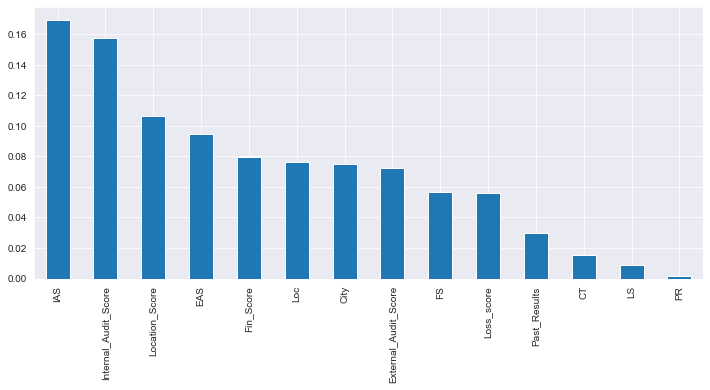

In [181]:
fig=plt.figure(figsize=(12,5))
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(15).plot(kind='bar')
plt.show()

In [197]:
x2=x.drop(["CT","LS","PR","Past_Results"],axis=1)

In [330]:
test2=test.drop(["CT","LS","PR","Past_Results"],axis=1)

In [ ]:
# splitting the dataset using train test split

In [349]:
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=3)

In [ ]:
# Printing the shape of splitted dataset

In [303]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (380, 12)
shape of y_train: (380,)
shape of x_test: (163, 12)
shape of y_test: (163,)


In [ ]:
# Applying machine learning algorithm on train dataset 3.390314244883443

In [350]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
prediction=etc.predict(x_test)
print("Log-Loss:",log_loss(y_test, prediction))

Log-Loss: 4.8736334469296825


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [351]:
mn=MultinomialNB()
mn.fit(x_train,y_train)
prediction=mn.predict(x_test)
print("Log-Loss:",log_loss(y_test, prediction))

Log-Loss: 7.840217890459389


In [352]:
cnb=ComplementNB()
cnb.fit(x_train,y_train)
prediction=cnb.predict(x_test)
print("Log-Loss:",log_loss(y_test, prediction))

Log-Loss: 7.628318651242573


In [353]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
prediction=bnb.predict(x_test)
print("Log-Loss:",log_loss(y_test, prediction))

Log-Loss: 3.3903093393777364


In [354]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)
print("Log-Loss:",log_loss(y_test, prediction))

Log-Loss: 3.602252728145912


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [355]:
svc=SVC()
svc.fit(x_train,y_train)
prediction=svc.predict(x_test)
print("Log-Loss:",log_loss(y_test, prediction))

Log-Loss: 10.38304309960112


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [356]:
nb=GaussianNB()
nb.fit(x_train,y_train)
prediction=nb.predict(x_test)
print("Log-Loss:",log_loss(y_test, prediction))

Log-Loss: 3.3903093393777364


In [357]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
prediction=bc.predict(x_test)
print("Log-Loss:",log_loss(y_test, prediction))

Log-Loss: 4.449849685013173


In [358]:
rf=RandomForestClassifier(n_estimators = 500, min_samples_leaf = 2, max_features = 10, max_depth = 6, criterion= 'entropy',random_state=108)
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)
print("Log-Loss:",log_loss(y_test, prediction))

Log-Loss: 4.026056112085249


In [359]:
dt=DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)
print("Log-Loss:",log_loss(y_test, prediction))

Log-Loss: 6.78072659988102


In [360]:
xgb=XGBClassifier(max_depth=30,learning_rate=0.01,colsample_bytree=.9,reg_alpha=3.2, reg_lambda=3.5,n_estimators=3000,gamma=1,n_jobs=-1)
prediction= xgb.fit(x_train,y_train).predict(x_test)
print("Log-Loss:",log_loss(y_test, prediction))

Log-Loss: 3.390358394434803


In [364]:
import lightgbm as 

ModuleNotFoundError: No module named 'lgb'

In [38]:
import catboost as cb

In [366]:
cat_rg1 = cb.CatBoostClassifier(iterations=2000,learning_rate=0.015, verbose=0)
cat_rg1.fit(x_train,y_train)
prediction=cat_rg1.predict(x_test)
print("Log-Loss:",log_loss(y_test, prediction))

Log-Loss: 3.39036329994051


In [344]:
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
prediction=sgd.predict(x_test)
print("Log-Loss:",log_loss(y_test, prediction))

Log-Loss: 6.020535327506086


In [345]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print("Log-Loss:",log_loss(y_test, prediction))

Log-Loss: 6.654325694220148


In [ ]:
# Applying best model

In [243]:
cat_rg1 = cb.CatBoostClassifier()
cat_rg1.fit(x2,y)
prediction=cat_rg1.predict_proba(test2)

Learning rate set to 0.007938
0:	learn: 0.6850010	total: 4.02ms	remaining: 4.01s
1:	learn: 0.6777222	total: 6.8ms	remaining: 3.39s
2:	learn: 0.6691560	total: 9.17ms	remaining: 3.05s
3:	learn: 0.6616835	total: 11.8ms	remaining: 2.93s
4:	learn: 0.6540488	total: 14.6ms	remaining: 2.9s
5:	learn: 0.6471913	total: 17.3ms	remaining: 2.87s
6:	learn: 0.6402632	total: 20.4ms	remaining: 2.89s
7:	learn: 0.6338921	total: 23.3ms	remaining: 2.89s
8:	learn: 0.6269483	total: 27.2ms	remaining: 3s
9:	learn: 0.6206706	total: 30.2ms	remaining: 2.99s
10:	learn: 0.6140705	total: 33.3ms	remaining: 2.99s
11:	learn: 0.6077813	total: 36.8ms	remaining: 3.03s
12:	learn: 0.6014698	total: 39.5ms	remaining: 3s
13:	learn: 0.5947280	total: 43.3ms	remaining: 3.05s
14:	learn: 0.5886852	total: 46.5ms	remaining: 3.05s
15:	learn: 0.5819960	total: 50ms	remaining: 3.07s
16:	learn: 0.5756062	total: 52.5ms	remaining: 3.04s
17:	learn: 0.5698931	total: 56.5ms	remaining: 3.08s
18:	learn: 0.5643024	total: 60.1ms	remaining: 3.1s
19:

186:	learn: 0.2837723	total: 664ms	remaining: 2.89s
187:	learn: 0.2834151	total: 667ms	remaining: 2.88s
188:	learn: 0.2828040	total: 671ms	remaining: 2.88s
189:	learn: 0.2822588	total: 674ms	remaining: 2.87s
190:	learn: 0.2819285	total: 678ms	remaining: 2.87s
191:	learn: 0.2815758	total: 681ms	remaining: 2.87s
192:	learn: 0.2813739	total: 685ms	remaining: 2.86s
193:	learn: 0.2810314	total: 689ms	remaining: 2.86s
194:	learn: 0.2806705	total: 692ms	remaining: 2.86s
195:	learn: 0.2802874	total: 695ms	remaining: 2.85s
196:	learn: 0.2795227	total: 699ms	remaining: 2.85s
197:	learn: 0.2789922	total: 703ms	remaining: 2.85s
198:	learn: 0.2786634	total: 707ms	remaining: 2.85s
199:	learn: 0.2780598	total: 710ms	remaining: 2.84s
200:	learn: 0.2776618	total: 714ms	remaining: 2.84s
201:	learn: 0.2772728	total: 718ms	remaining: 2.83s
202:	learn: 0.2767062	total: 722ms	remaining: 2.83s
203:	learn: 0.2763041	total: 726ms	remaining: 2.83s
204:	learn: 0.2756705	total: 730ms	remaining: 2.83s
205:	learn: 

360:	learn: 0.2275668	total: 1.32s	remaining: 2.34s
361:	learn: 0.2274169	total: 1.33s	remaining: 2.34s
362:	learn: 0.2272059	total: 1.33s	remaining: 2.34s
363:	learn: 0.2269083	total: 1.33s	remaining: 2.33s
364:	learn: 0.2265639	total: 1.34s	remaining: 2.33s
365:	learn: 0.2262602	total: 1.34s	remaining: 2.33s
366:	learn: 0.2260487	total: 1.35s	remaining: 2.32s
367:	learn: 0.2258234	total: 1.35s	remaining: 2.32s
368:	learn: 0.2255888	total: 1.35s	remaining: 2.31s
369:	learn: 0.2255173	total: 1.36s	remaining: 2.31s
370:	learn: 0.2252907	total: 1.36s	remaining: 2.3s
371:	learn: 0.2249360	total: 1.36s	remaining: 2.3s
372:	learn: 0.2246806	total: 1.37s	remaining: 2.3s
373:	learn: 0.2245345	total: 1.37s	remaining: 2.29s
374:	learn: 0.2243661	total: 1.38s	remaining: 2.29s
375:	learn: 0.2242114	total: 1.38s	remaining: 2.29s
376:	learn: 0.2240638	total: 1.38s	remaining: 2.28s
377:	learn: 0.2237131	total: 1.39s	remaining: 2.28s
378:	learn: 0.2235411	total: 1.39s	remaining: 2.27s
379:	learn: 0.2

537:	learn: 0.1943779	total: 1.98s	remaining: 1.7s
538:	learn: 0.1941433	total: 1.98s	remaining: 1.7s
539:	learn: 0.1939187	total: 1.99s	remaining: 1.69s
540:	learn: 0.1938136	total: 1.99s	remaining: 1.69s
541:	learn: 0.1936699	total: 2s	remaining: 1.69s
542:	learn: 0.1934349	total: 2s	remaining: 1.68s
543:	learn: 0.1929729	total: 2s	remaining: 1.68s
544:	learn: 0.1925406	total: 2.01s	remaining: 1.68s
545:	learn: 0.1923910	total: 2.01s	remaining: 1.67s
546:	learn: 0.1923125	total: 2.02s	remaining: 1.67s
547:	learn: 0.1920504	total: 2.02s	remaining: 1.67s
548:	learn: 0.1919482	total: 2.02s	remaining: 1.66s
549:	learn: 0.1917997	total: 2.03s	remaining: 1.66s
550:	learn: 0.1917509	total: 2.03s	remaining: 1.66s
551:	learn: 0.1915926	total: 2.04s	remaining: 1.65s
552:	learn: 0.1915056	total: 2.04s	remaining: 1.65s
553:	learn: 0.1913360	total: 2.04s	remaining: 1.64s
554:	learn: 0.1909769	total: 2.05s	remaining: 1.64s
555:	learn: 0.1909158	total: 2.05s	remaining: 1.64s
556:	learn: 0.1906971	t

718:	learn: 0.1651708	total: 2.65s	remaining: 1.03s
719:	learn: 0.1650625	total: 2.65s	remaining: 1.03s
720:	learn: 0.1649340	total: 2.65s	remaining: 1.03s
721:	learn: 0.1648807	total: 2.66s	remaining: 1.02s
722:	learn: 0.1648245	total: 2.66s	remaining: 1.02s
723:	learn: 0.1645434	total: 2.66s	remaining: 1.01s
724:	learn: 0.1642795	total: 2.67s	remaining: 1.01s
725:	learn: 0.1640645	total: 2.67s	remaining: 1.01s
726:	learn: 0.1639381	total: 2.67s	remaining: 1s
727:	learn: 0.1636676	total: 2.68s	remaining: 1s
728:	learn: 0.1635270	total: 2.68s	remaining: 997ms
729:	learn: 0.1634263	total: 2.69s	remaining: 994ms
730:	learn: 0.1631166	total: 2.69s	remaining: 990ms
731:	learn: 0.1629294	total: 2.69s	remaining: 986ms
732:	learn: 0.1627998	total: 2.7s	remaining: 983ms
733:	learn: 0.1624996	total: 2.7s	remaining: 979ms
734:	learn: 0.1623292	total: 2.7s	remaining: 975ms
735:	learn: 0.1621700	total: 2.71s	remaining: 971ms
736:	learn: 0.1619421	total: 2.71s	remaining: 968ms
737:	learn: 0.1618369

909:	learn: 0.1374780	total: 3.32s	remaining: 328ms
910:	learn: 0.1373290	total: 3.32s	remaining: 325ms
911:	learn: 0.1371945	total: 3.33s	remaining: 321ms
912:	learn: 0.1371467	total: 3.33s	remaining: 317ms
913:	learn: 0.1368748	total: 3.33s	remaining: 314ms
914:	learn: 0.1367532	total: 3.34s	remaining: 310ms
915:	learn: 0.1367224	total: 3.34s	remaining: 306ms
916:	learn: 0.1366579	total: 3.34s	remaining: 303ms
917:	learn: 0.1365503	total: 3.35s	remaining: 299ms
918:	learn: 0.1364231	total: 3.35s	remaining: 295ms
919:	learn: 0.1362853	total: 3.35s	remaining: 292ms
920:	learn: 0.1361678	total: 3.36s	remaining: 288ms
921:	learn: 0.1360043	total: 3.36s	remaining: 285ms
922:	learn: 0.1358432	total: 3.37s	remaining: 281ms
923:	learn: 0.1357481	total: 3.37s	remaining: 277ms
924:	learn: 0.1356271	total: 3.38s	remaining: 274ms
925:	learn: 0.1354324	total: 3.38s	remaining: 270ms
926:	learn: 0.1353532	total: 3.38s	remaining: 266ms
927:	learn: 0.1351305	total: 3.39s	remaining: 263ms
928:	learn: 

In [85]:
etc=ExtraTreesClassifier(n_estimators=100)
etc.fit(x,y)
prediction=etc.predict_proba(test)
0.30323

In [272]:
knn=KNeighborsClassifier()
knn.fit(x1,y)
prediction=knn.predict_proba(test1)

In [283]:
svc=SVC(probability=True)
svc.fit(x1,y)
prediction=svc.predict_proba(test1)

In [209]:
rf=RandomForestClassifier()
rf.fit(x2,y)
prediction=rf.predict_proba(test2)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [232]:
bnb=BernoulliNB()
bnb.fit(x2,y)
prediction=bnb.predict_proba(test2)

In [ ]:
# Converting prediction to Dataframe

In [244]:
final_prediction=pd.DataFrame(prediction)

In [ ]:
# convert to csv

In [245]:
final_prediction.to_csv("FR24.csv",index=False)

In [38]:
final=pd.DataFrame({"IsUnderRisk":prediction})

In [ ]:
# Preparing as per sample submission

In [40]:
final_submission=pd.get_dummies(final["IsUnderRisk"])

In [ ]:
# convert to csv

In [28]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [29]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
prediction=grid_search.predict(x_test)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.9min finished
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
print("Log-Loss:",log_loss(y_test, prediction))

Log-Loss: 4.413336959192655


In [ ]:
## Feature engineering